In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from PIL import Image
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import os

## Data exploration

In [4]:
labels = {
    0: 'badminton',
    1: 'baseball',
    2: 'basketball',
    3: 'boxing',
    4: 'chess',
    5: 'cricket',
    6: 'fencing',
    7: 'football',
    8: 'formula1',
    9: 'gymnastics',
    10: 'hockey',
    11: 'ice_hockey',
    12: 'kabaddi',
    13: 'motogp',
    14: 'shooting',
    15: 'swimming',
    16: 'table_tennis',
    17: 'tennis',
    18: 'volleyball',
    19: 'weight_lifting',
    20: 'wrestling',
    21: 'wwe'
}

Important to replicate the same data folder structure, as it won't be uploaded to git

In [6]:
DATA_DIR = 'input/data/'
DATA_CSV = 'input/data.csv' 

In [8]:
df = pd.read_csv(DATA_CSV)
print(df.head(5), "\n")
print("Shape: \t", df.shape)
print("Number of different classes: ", len(df['target'].unique()))

                             image_path  target
0    input/data/gymnastics/00000774.jpg     9.0
1  input/data/table_tennis/00000702.jpg    16.0
2       input/data/fencing/00000275.jpg     6.0
3      input/data/baseball/00000380.jpg     1.0
4       input/data/cricket/00000303.jpg     5.0 

Shape: 	 (13800, 2)
Number of different classes:  22


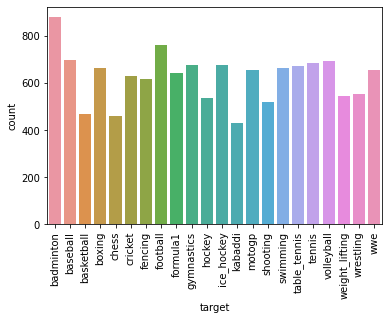

In [10]:
ax = sns.countplot(
    df['target'],
    
)
ax.set_xticklabels(labels.values(), rotation=90);

### Creating panda datasets

In [12]:
train_df, val_df, test_df = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])


In [14]:
train_df.shape, val_df.shape, test_df.shape

((11040, 2), (1380, 2), (1380, 2))

In [16]:
train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [18]:
print(train_df.head(5))


   level_0  index                            image_path  target
0        0  10436        input/data/tennis/00000511.jpg    17.0
1        1    283  input/data/table_tennis/00000136.jpg    16.0
2        2   2275    input/data/ice_hockey/00000378.JPG    11.0
3        3   9663  input/data/table_tennis/00000281.jpg    16.0
4        4   8432        input/data/motogp/00000445.jpg    13.0


In [20]:
print(train_df["image_path"][0])


input/data/tennis/00000511.jpg


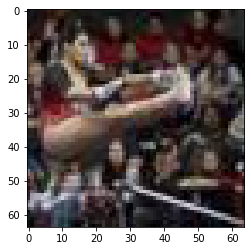

In [26]:
img = Image.open(train_df["image_path"][0])
plt.imshow(img)

### Auxiliar functions

In [22]:
def decode_image(img):
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels = 3)
    # Optional resize
    #return tf.image.resize(img, [img_height, img_widht])
    return img

In [23]:
def process_path(file_path):

    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    
    img = decode_image(img)
    return img

### Creating the train dataset

In [24]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(train_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(train_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
train_ds = tf.data.Dataset.zip((list_ds, label_ds))

In [25]:
# Checking
print(train_ds.element_spec)
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))
Image shape:  (64, 64, 3)
Label:  17.0


### Creating the test and validation dataset

In [26]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(test_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(test_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
test_ds = tf.data.Dataset.zip((list_ds, label_ds))

In [28]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(val_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(val_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
valid_ds = tf.data.Dataset.zip((list_ds, label_ds))

### Set comprobations

In [30]:
# Checking the lenghts
print(test_ds.element_spec)
print(valid_ds.element_spec)


(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))
(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))


In [32]:
for image, label in test_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (64, 64, 3)
Label:  12.0


In [33]:
for image, label in valid_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (64, 64, 3)
Label:  10.0


In [40]:
counter = 0
for image, label in train_ds:
  counter +=1
print("Train dataset tiene: ", counter)
counter = 0
for image, label in test_ds:
  counter +=1
print("Test dataset tiene: ", counter)
counter = 0
for image, label in valid_ds:
  counter +=1
print("Valid dataset tiene: ", counter)

Train dataset tiene:  11040
Test dataset tiene:  1380
Valid dataset tiene:  1380


### Visualizing TF datasets

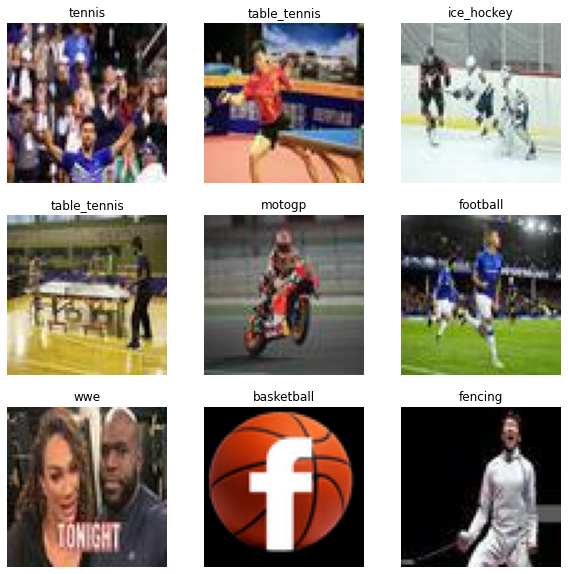

In [50]:
plt.figure(figsize=(10, 10))
i = 0
for image, label in train_ds.take(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(labels[label.numpy()])
    plt.axis("off")
    i+=1